# EDA for AirBnB listings in Valencia 
## Introduction

I intend to use this EDA to introduce some findings to AirBnB customer success team, so they can draw up a folowup plan for AirBnB hosts to improve quality of their listings.

Here are the steps:
1. Explore the Dataframe to Understand the Structure and Values 
2. Clean the Dataframe
3. Aspects to be analysed 
    a. Price
    b. Neighbourhood
    c. Reviews
    d. Availibity

4. Summary


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [3]:
# Open the file

listings = pd.read_csv('/Users/xiejing/Desktop/Codeoptest/assign_week7/module-3-milestone_JX/listings.csv')

## Step 1. Explore the Dataframe to Understand the Structure and Values 

In [4]:
listings.shape

(8699, 75)

In [5]:
listings["availability_30"].value_counts()

availability_30
0     1150
30    1040
29     943
19     358
23     300
20     272
21     269
18     261
16     258
17     248
22     245
28     237
25     225
24     219
14     218
27     217
15     210
26     205
13     192
10     185
11     182
7      159
12     149
9      148
8      144
6      126
5      123
2      109
4      108
1      104
3       95
Name: count, dtype: int64

In [6]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [7]:
print(listings.describe(include='number'))

# identify numerical columns can be potentially analysed

                 id     scrape_id       host_id  host_listings_count  \
count  8.699000e+03  8.699000e+03  8.699000e+03          8699.000000   
mean   7.044639e+17  2.024122e+13  2.632870e+08            25.704449   
std    5.011077e+17  6.719136e-01  2.089973e+08            89.956170   
min    4.815400e+04  2.024122e+13  5.947000e+03             1.000000   
25%    4.652705e+07  2.024122e+13  6.609287e+07             1.000000   
50%    9.070951e+17  2.024122e+13  2.007789e+08             4.000000   
75%    1.126331e+18  2.024122e+13  4.653248e+08            14.000000   
max    1.315838e+18  2.024122e+13  6.672435e+08          3275.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                8699.000000  8699.000000  8699.000000   8699.000000   
mean                   34.564433    39.467576    -0.364405      3.454420   
std                   172.226036     0.020998     0.023149      1.855702   
min                     1.000000    39.279780  

In [8]:
listings["host_neighbourhood"].value_counts()

host_neighbourhood
Ciutat Vella           738
Extramurs              442
Poblados Marítimos     300
L'Eixample             201
Camins al Grau         103
                      ... 
Westelijke Eilanden      1
Arapiles                 1
Woolwich                 1
Barrio Norte             1
Sants-Montjuïc           1
Name: count, Length: 62, dtype: int64

In [9]:
# to see if price value can be processed directly or needs to be preprocessed first, and yes it needs to be processed
listings['price'] 

0       $150.00
1       $390.00
2       $204.00
3       $132.00
4        $48.00
         ...   
8694    $146.00
8695    $142.00
8696     $81.00
8697     $42.00
8698    $152.00
Name: price, Length: 8699, dtype: object

In [10]:
listings["neighbourhood_group_cleansed"].value_counts()

neighbourhood_group_cleansed
POBLATS MARITIMS     1639
CIUTAT VELLA         1527
QUATRE CARRERES       769
CAMINS AL GRAU        749
L'EIXAMPLE            738
EXTRAMURS             693
LA SAIDIA             533
ALGIROS               324
JESUS                 303
L'OLIVERETA           265
PATRAIX               199
BENICALAP             182
RASCANYA              163
POBLATS DEL SUD       160
EL PLA DEL REAL       151
CAMPANAR              136
BENIMACLET            105
POBLATS DE L'OEST      51
POBLATS DEL NORD       12
Name: count, dtype: int64

In [11]:
listings.accommodates.unique()

array([ 4,  7, 10,  5,  3,  2,  1,  6,  8,  9, 12, 14, 16, 11, 13])

In [12]:
listings.property_type.unique()
# too many type values to analyse

array(['Entire rental unit', 'Entire home', 'Private room in rental unit',
       'Entire loft', 'Entire townhouse', 'Entire villa',
       'Entire serviced apartment', 'Entire condo',
       'Private room in home', 'Entire place', 'Tiny home',
       'Private room in condo', 'Shared room in rental unit',
       'Private room in townhouse', 'Private room in bed and breakfast',
       'Room in boutique hotel', 'Entire cottage',
       'Private room in hostel', 'Entire chalet', 'Room in hostel',
       'Private room in guest suite', 'Private room in guesthouse',
       'Private room in casa particular',
       'Private room in serviced apartment', 'Entire bungalow',
       'Room in hotel', 'Room in aparthotel', 'Entire guest suite',
       'Entire guesthouse', 'Boat', 'Private room in vacation home',
       'Entire vacation home', 'Private room', 'Camper/RV',
       'Private room in loft', 'Casa particular', 'Houseboat',
       'Entire cabin', 'Castle', 'Private room in cabin',
       'P

In [13]:
listings.columns[listings.isnull().all()]

Index(['calendar_updated'], dtype='object')

## Step 2. Clean the Dataframe

In [14]:
# Dropping columns that have all values missing
listings = listings.dropna(axis=1, how='all')

# Removing duplicate listings based on 'id' column
listings = listings.drop_duplicates(subset=['id'], keep='first')

# Checking for missing values in the dataset
missing_values = listings.isnull().sum().sort_values(ascending=False)
missing_values_percentage = (listings.isnull().sum() / len(listings) * 100).sort_values(ascending=False)

# Creating a DataFrame to display missing values
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0]  # Filtering out columns with no missing values

listings.shape

(8699, 74)

In [15]:
missing_data

,Missing Values,Percentage
license,6528,75.043108
host_neighbourhood,6345,72.939418
neighborhood_overview,4664,53.615358
neighbourhood,4664,53.615358
host_about,4150,47.706633
host_location,2189,25.163812
reviews_per_month,1480,17.013450
review_scores_accuracy,1480,17.013450
first_review,1480,17.013450
review_scores_rating,1480,17.013450


In [16]:
# Convert the value from object to float
listings['price'] = listings['price'].astype(str)
listings['price'] = listings['price'].str.replace(r'[\$,]', '', regex=True)
listings['price'] = pd.to_numeric(listings['price'], errors='coerce')
listings['price'] 

0       150.0
1       390.0
2       204.0
3       132.0
4        48.0
        ...  
8694    146.0
8695    142.0
8696     81.0
8697     42.0
8698    152.0
Name: price, Length: 8699, dtype: float64

## Step 3. Aspects to be analysed 

### Price

In [17]:
#578 out of 8699 records (~6.6%) have missing price values, So I decide to drop them
listings_cleaned = listings.dropna(subset=['price'])

lower_bound = listings['price'].quantile(0.05)  # 5th percentile
upper_bound = listings['price'].quantile(0.95)  # 95th percentile
print(f"90% of the listings falls to Range: ${lower_bound:.2f} to ${upper_bound:.2f}")

90% of the listings falls to Range: $28.00 to $250.00


In [18]:
#Median & Mean, I'll use the Range shown above to find the Mean and Median

# Filter the DataFrame
listings_cleaned = listings_cleaned[(listings_cleaned['price'] >= lower_bound) & (listings_cleaned['price'] <= upper_bound)]

# Reset index
listings_cleaned = listings_cleaned.reset_index(drop=True)

print(f"Price_mean: ${listings_cleaned.price.mean():.2f}"
        f" Price_median: ${listings_cleaned.price.median():.2f}"
        f" Price_max: ${listings_cleaned.price.max():.2f}"
        f" Price_min: ${listings_cleaned.price.min():.2f}"
    )

Price_mean: $93.88 Price_median: $85.00 Price_max: $250.00 Price_min: $28.00


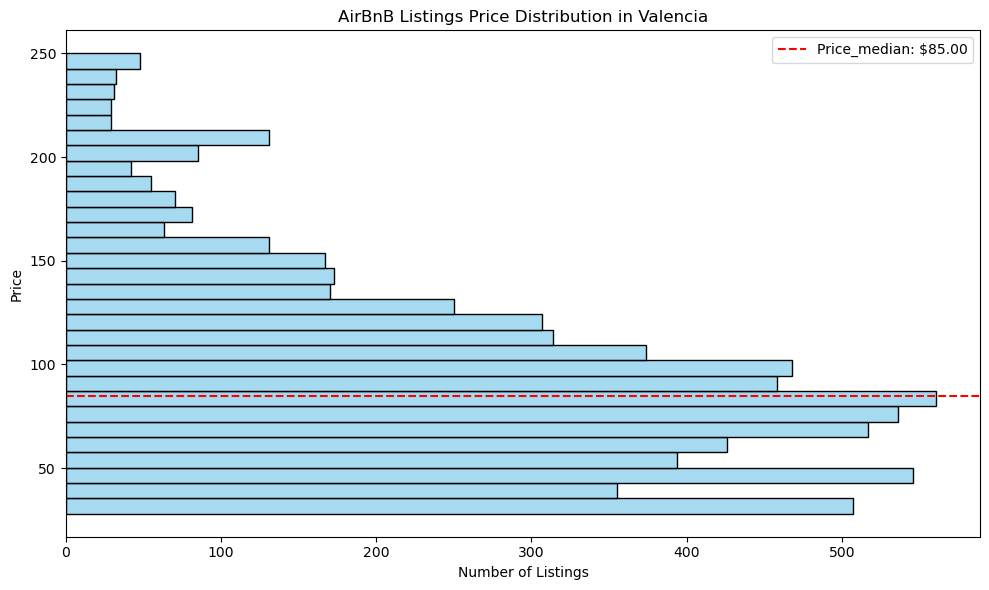

In [19]:
# create histogram
plt.figure(figsize=(10, 6))
sns.histplot(y='price', data=listings_cleaned, bins=30, kde=False, color='skyblue')  # Changed to y='price'

# Mark the median price
median_price = listings_cleaned['price'].median()
plt.axhline(y=median_price, color='red', linestyle='--', label=f'Price_median: ${median_price:.2f}')  # Changed to axhline

# Customize the plot
plt.title('AirBnB Listings Price Distribution in Valencia')
plt.ylabel('Price')  # Changed xlabel to ylabel
plt.xlabel('Number of Listings')  # Changed ylabel to xlabel
plt.legend()
plt.tight_layout()

### Neighbourhood

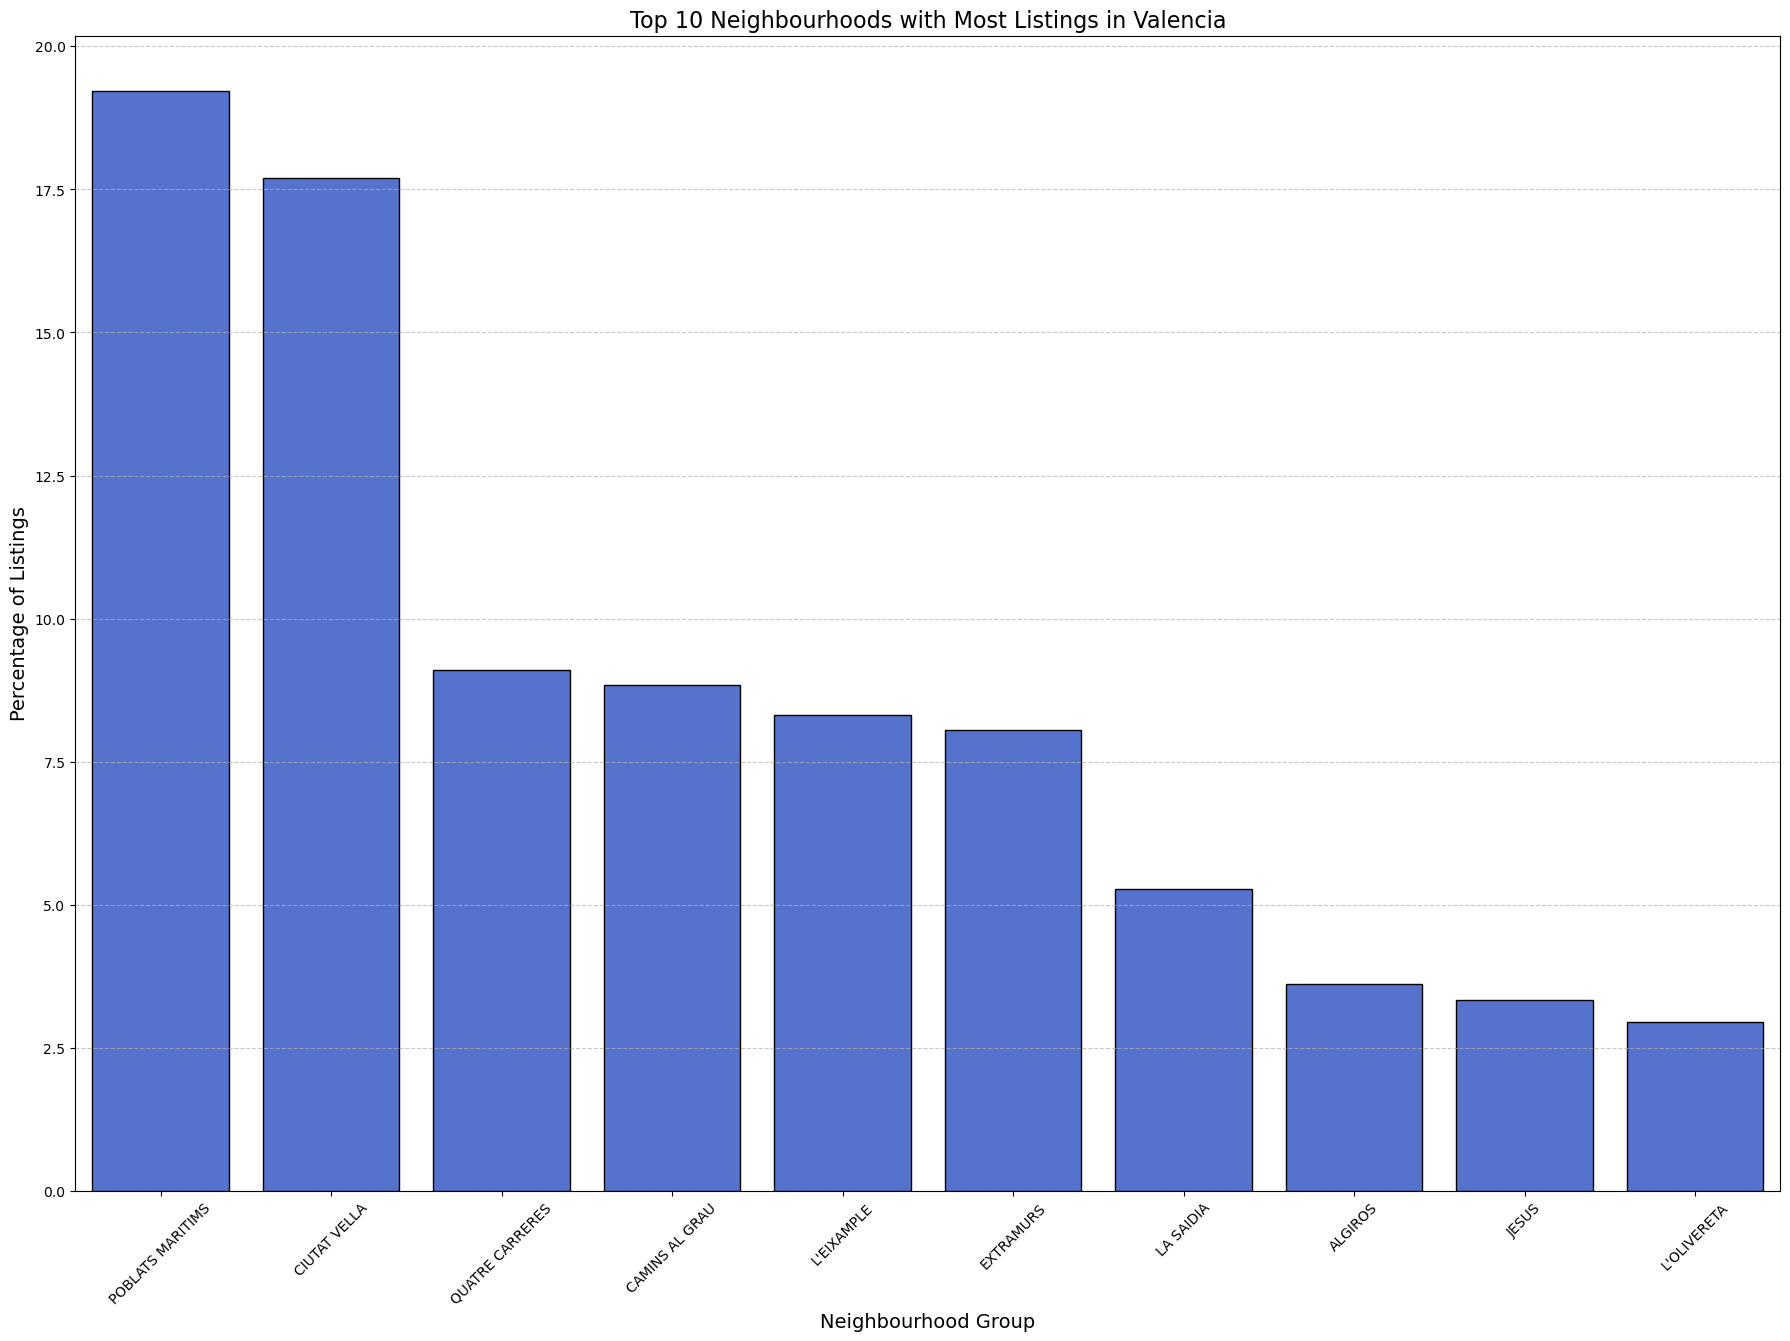

In [20]:
# Calculate the percentage of listings per neighbourhood group
neighbourhood_counts = listings_cleaned['neighbourhood_group_cleansed'].value_counts(normalize=True) * 100
neighbourhood_counts_listings = neighbourhood_counts.reset_index()
neighbourhood_counts_listings.columns = ['neighbourhood_group', 'percentage']

# Get the top 10 neighbourhoods with most listings
top_10_neighbourhoods = neighbourhood_counts_listings.head(10)['neighbourhood_group'].tolist()

# Filter listings to only include the top 10 neighbourhoods
listings_top10 = listings[listings['neighbourhood_group_cleansed'].isin(top_10_neighbourhoods)]

# bar plot for top 10 neighbourhoods
plt.figure(figsize=(22, 15))
sns.barplot(x='neighbourhood_group', y='percentage', data=neighbourhood_counts_listings.head(10), color='royalblue', edgecolor='black')

plt.title("Top 10 Neighbourhoods with Most Listings in Valencia", fontsize=16)
plt.xlabel("Neighbourhood Group", fontsize=14)
plt.ylabel("Percentage of Listings", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

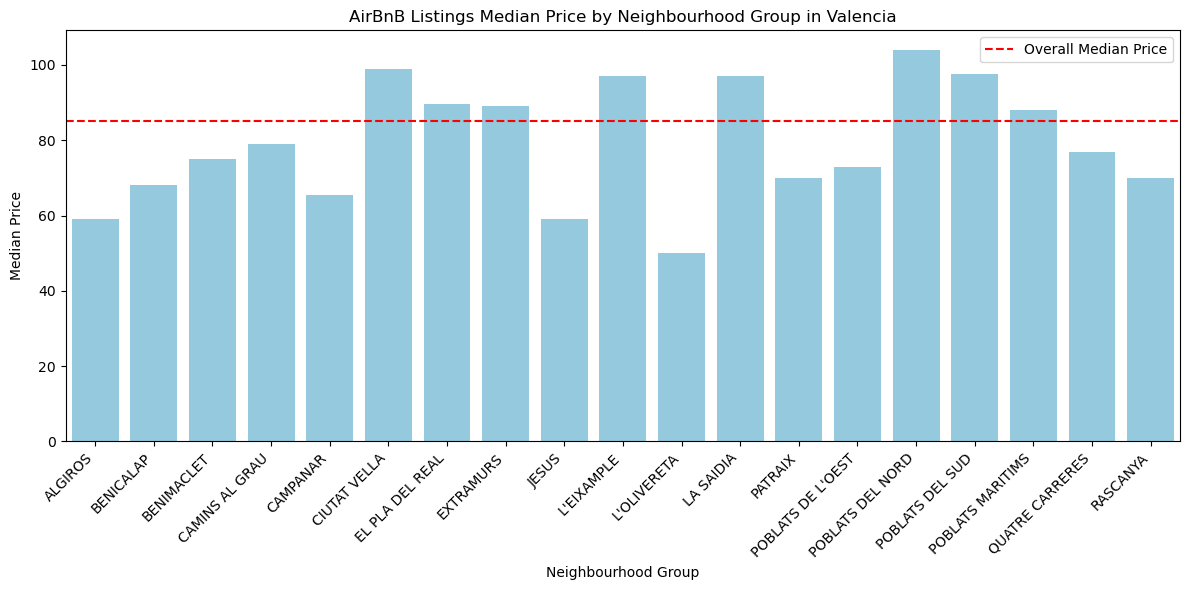

In [21]:
# median prices by neighborhood group
median_prices = listings.groupby('neighbourhood_group_cleansed')['price'].median().reset_index()
median_prices.columns = ['neighbourhood_group', 'price_median']

# overall median price
overall_median_price = listings['price'].median()

# bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood_group', y='price_median', data=median_prices, color='skyblue')
plt.axhline(y=overall_median_price, color='red', linestyle='--', label='Overall Median Price')

plt.title('AirBnB Listings Median Price by Neighbourhood Group in Valencia')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Median Price')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()


In [22]:
# Identify hosts with multiple listings and have listing in POBLATS DEL NORD
hosts_with_multiple_listings = listings_cleaned.groupby('host_id')['id'].count().reset_index()
hosts_with_multiple_listings = hosts_with_multiple_listings[hosts_with_multiple_listings['id'] > 1]['host_id'].tolist()

listings_in_poblats_del_nord = listings_cleaned[listings_cleaned['neighbourhood_group_cleansed'] == 'POBLATS DEL NORD']['host_id'].tolist()

common_hosts = list(set(hosts_with_multiple_listings) & set(listings_in_poblats_del_nord))

if common_hosts:
    print("Hosts with multiple listings and listings in POBLATS DEL NORD:")
    print(common_hosts)
else:
    print("No hosts with multiple listings have listings in POBLATS DEL NORD.")

Hosts with multiple listings and listings in POBLATS DEL NORD:
[125037312, 477505643]


### Ratings 

In [23]:
# number of view max, min, mean & median
print(
    f" number_of_reviews_max: {listings_cleaned.number_of_reviews.max():.2f}"
    f" number_of_reviews_min: {listings_cleaned.number_of_reviews.min():.2f}"
    f" number_of_reviews_mean: {listings_cleaned.number_of_reviews.mean():.2f}"
    f" number_of_reviews_median: {listings_cleaned.number_of_reviews.median():.2f}"        
    )

 number_of_reviews_max: 896.00 number_of_reviews_min: 0.00 number_of_reviews_mean: 50.46 number_of_reviews_median: 16.00


Median review number is 16.0
Median of Review-Related Factors:
                Review Factors  Median
0       review_scores_accuracy    4.82
1    review_scores_cleanliness    4.78
2        review_scores_checkin    4.88
3  review_scores_communication    4.90
4       review_scores_location    4.77
5          review_scores_value    4.67


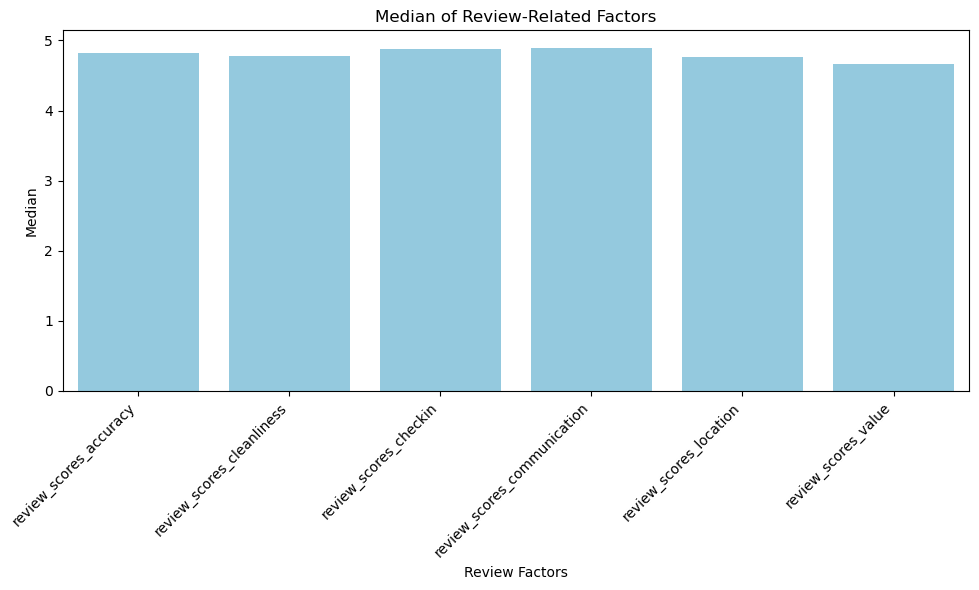

In [24]:
median_review_number = listings_cleaned["number_of_reviews"].median()

# Review Factors to analyze 
columns_to_analyze = [ 'review_scores_accuracy',
                      'review_scores_cleanliness', 'review_scores_checkin',
                      'review_scores_communication', 'review_scores_location',
                      'review_scores_value']

medians = listings_cleaned[columns_to_analyze].median()

# Create a DataFrame for plotting and printing
medians_df = pd.DataFrame({'Review Factors': medians.index, 'Median': medians.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='Review Factors', y='Median', data=medians_df, color='skyblue')  
plt.title('Median of Review-Related Factors')
plt.xlabel('Review Factors')
plt.ylabel('Median')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

print(f"Median review number is {median_review_number}")
print("Median of Review-Related Factors:")
print(medians_df)

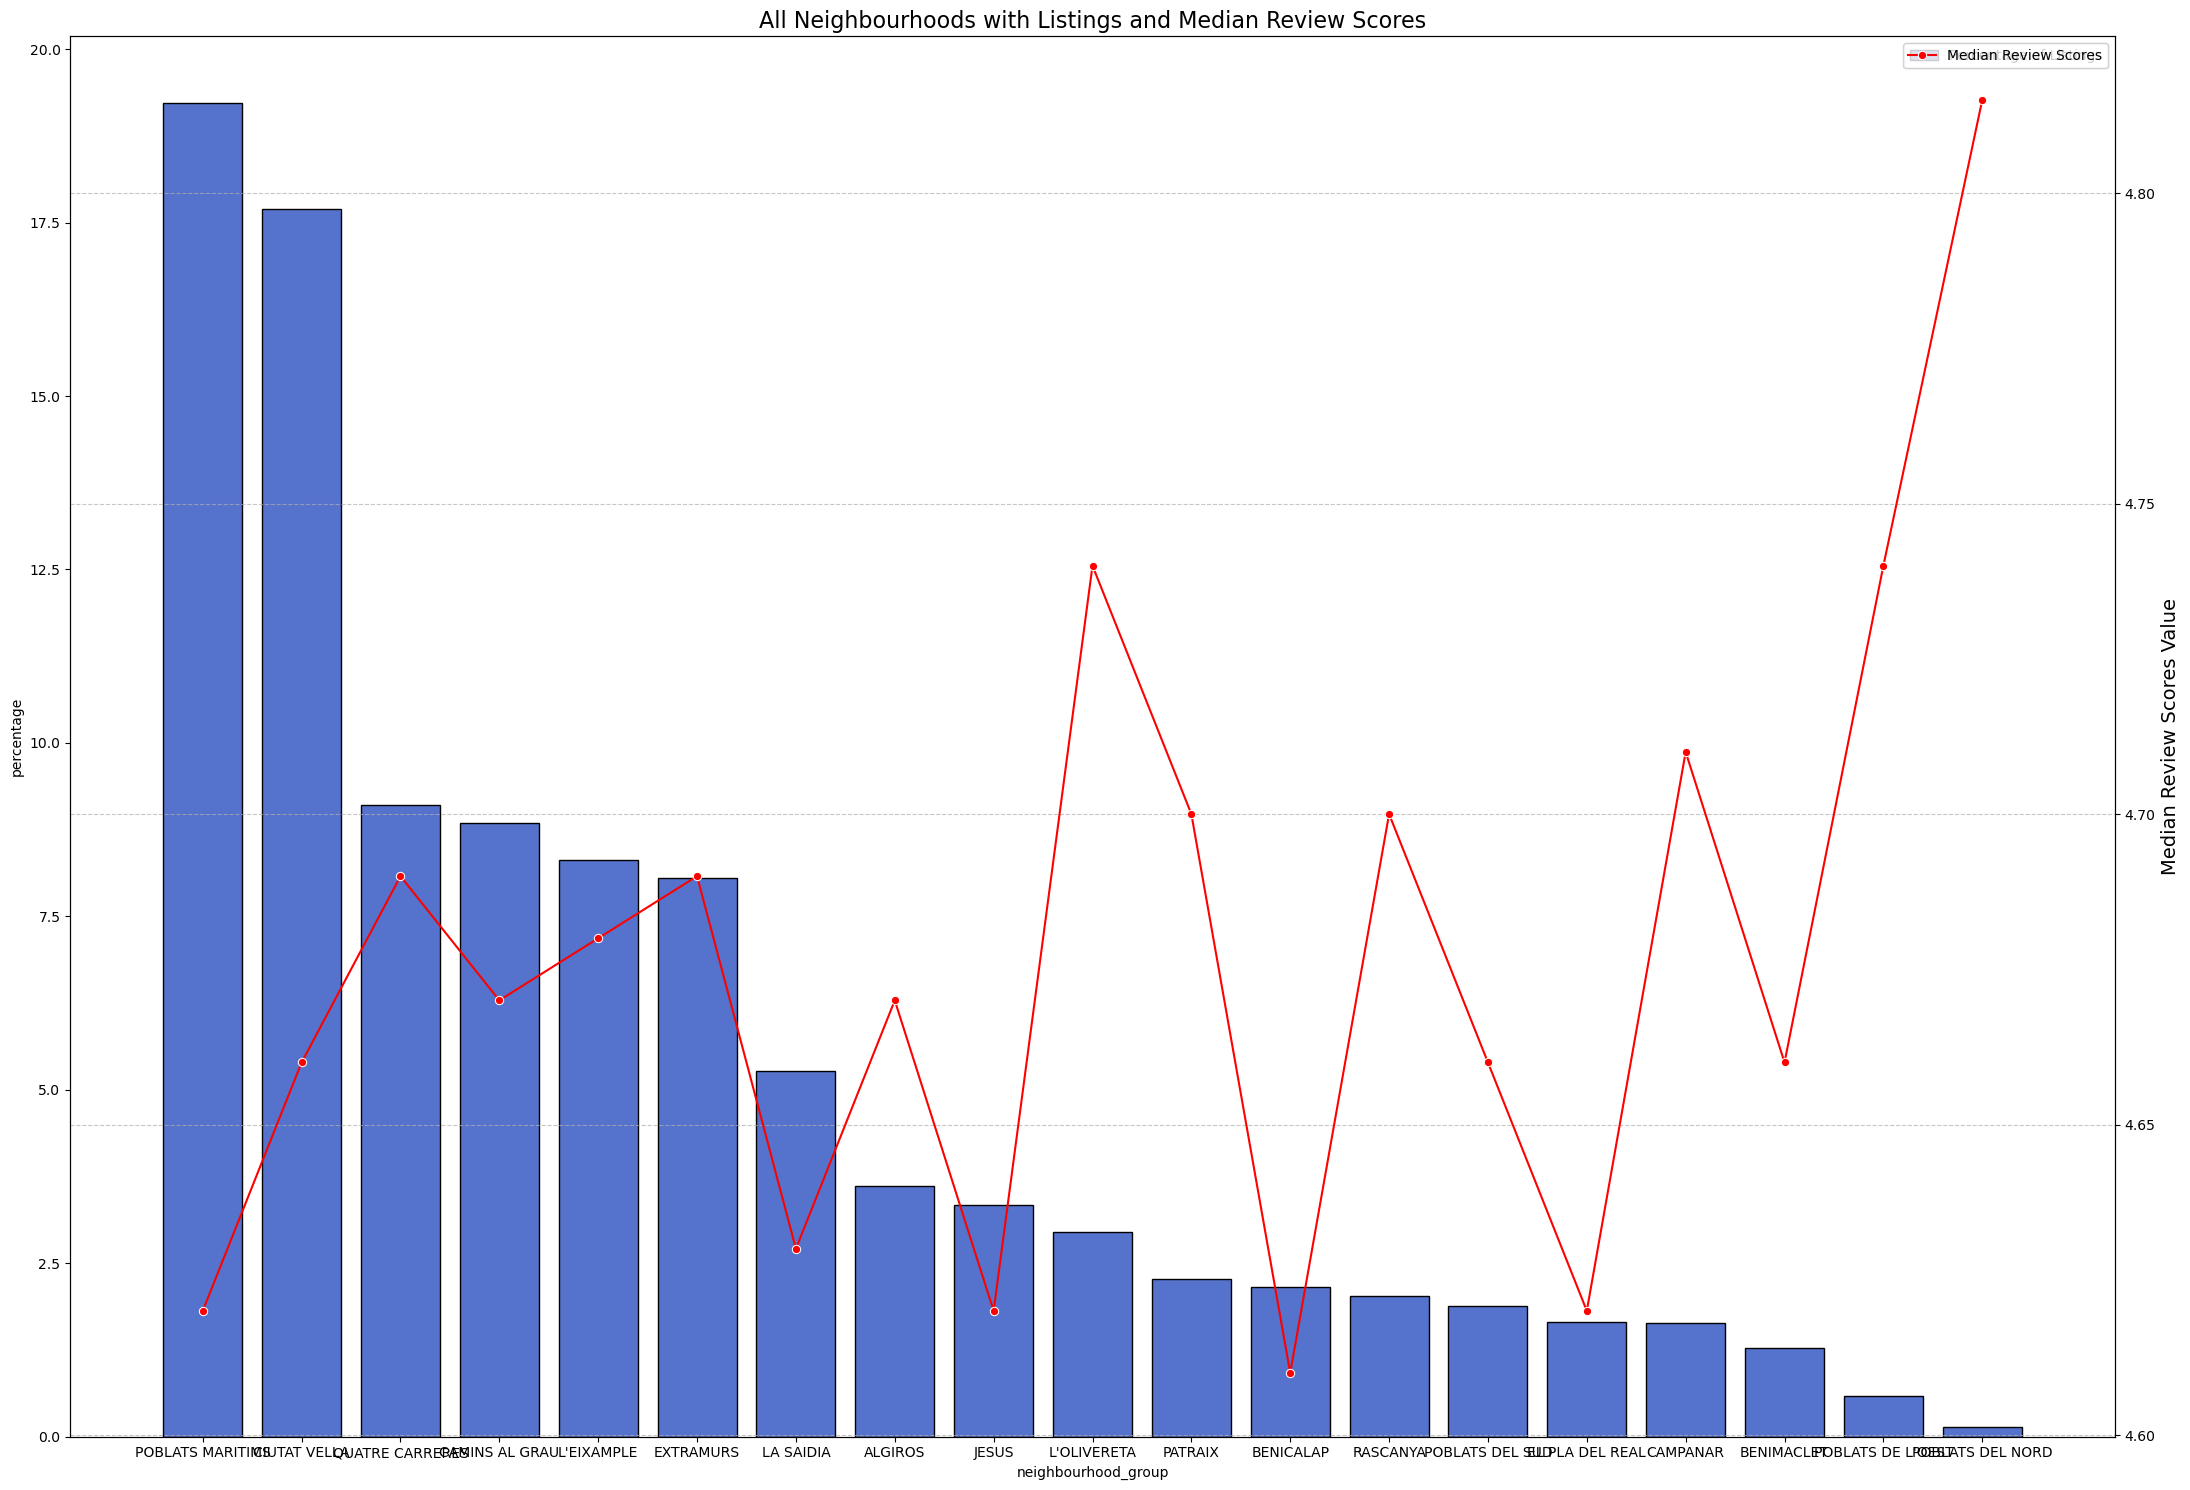

In [25]:
# Calculate median review scores for each neighborhood
neighbourhood_median_reviews = listings_cleaned.groupby('neighbourhood_group_cleansed')['review_scores_value'].median().reset_index()
neighbourhood_median_reviews.columns = ['neighbourhood_group', 'review_scores_value_median']

neighbourhood_data = pd.merge(neighbourhood_counts_listings, neighbourhood_median_reviews, on='neighbourhood_group')

neighbourhood_data = neighbourhood_data.sort_values(by=['percentage'], ascending=False)


plt.figure(figsize=(22, 15)) 

sns.barplot(x='neighbourhood_group', y='percentage', data=neighbourhood_data, color='royalblue', edgecolor='black', label='Percentage of Listings')

ax2 = plt.twinx()
sns.lineplot(x='neighbourhood_group', y='review_scores_value_median', data=neighbourhood_data, color='red', marker='o', ax=ax2, label='Median Review Scores')

plt.title("All Neighbourhoods with Listings and Median Review Scores", fontsize=16)  
plt.xlabel("Neighbourhood Group", fontsize=14)
plt.ylabel("Percentage of Listings", fontsize=14)
ax2.set_ylabel("Median Review Scores Value", fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(loc='upper right')
plt.tight_layout() 

In [26]:
# Access the subsets using the neighborhood group as the key to identify listings whose review rating is below the median, i.e., neighbourhood_subsets["POBLATS MARITIMS"]median_ratings = listings_cleaned.groupby('neighbourhood_group_cleansed')['review_scores_value'].median()

#Calculate median rating per neighborhood group
median_ratings = listings_cleaned.groupby('neighbourhood_group_cleansed')['review_scores_value'].median()

neighbourhood_subsets = {}
for group, median_rating in median_ratings.items():
    # Filter listings below the median for the current group
    subset = listings_cleaned[(listings_cleaned['neighbourhood_group_cleansed'] == group) & (listings_cleaned['review_scores_value'] < median_rating)]
    # Store the subset in the dictionary with the neighborhood group as the key
    neighbourhood_subsets[group] = subset
    

neighbourhood_subsets["POBLATS MARITIMS"]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
15,323609,https://www.airbnb.com/rooms/323609,20241221052019,2024-12-21,city scrape,"Beach Villa, patio and bbq. Cabanyal",Beautiful apartment on the beachfront. It has ...,Located in front of the promenade and Las Aren...,https://a0.muscache.com/pictures/miso/Hosting-...,1332880,...,4.59,4.68,4.18,NaN,f,2,2,0,0,0.28
78,1231911,https://www.airbnb.com/rooms/1231911,20241221052019,2024-12-21,city scrape,Sunny flat near uni + Malvarrosa beach,Wide and sunny flat in Cabanyal zone ( very ty...,The neighborhood is quiet.,https://a0.muscache.com/pictures/45172093/6b93...,3701192,...,4.93,4.34,4.61,VT-33995-V,f,2,2,0,0,0.40
94,1702630,https://www.airbnb.com/rooms/1702630,20241221052019,2024-12-21,city scrape,Charming house next to the beach,The Cladami apartment is completely renovated ...,The apartment is located in the famous neighbo...,https://a0.muscache.com/pictures/fac147c6-8ae4...,8988014,...,4.81,4.57,4.36,VT-36805-V,t,7,7,0,0,0.90
114,2452337,https://www.airbnb.com/rooms/2452337,20241221052019,2024-12-21,city scrape,Estudio para parejas con WIFI en la playa,"Located in a beautiful and small, very picture...",The apartment is located in the famous Cabanya...,https://a0.muscache.com/pictures/9491f1bf-98bb...,8988014,...,4.84,4.64,4.46,VT-36803-V,t,7,7,0,0,1.39
138,3331996,https://www.airbnb.com/rooms/3331996,20241221052019,2024-12-21,city scrape,Ancient fisher flat near city beach,Our flat is 100 years old and has been renewed...,"Neighbours go to work early, please respect th...",https://a0.muscache.com/pictures/4343bf0e-ee2a...,6269463,...,4.75,4.75,4.50,VT-38136-V,f,1,1,0,0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6857,1262942601183262478,https://www.airbnb.com/rooms/1262942601183262478,20241221052019,2024-12-21,city scrape,Apartamento en Valencia,"Excellent modern studio, located a few meters ...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,427838001,...,5.00,1.00,3.00,NaN,f,1,1,0,0,0.71
6861,1263628417790838904,https://www.airbnb.com/rooms/1263628417790838904,20241221052019,2024-12-21,city scrape,Enchanting 3 Bedroom Apartment in El Cabanyal,Experience the comfort of our fully furnished ...,The Cabanyal neighborhood is the fishing / mar...,https://a0.muscache.com/pictures/prohost-api/H...,417948112,...,5.00,5.00,4.00,NaN,t,147,147,0,0,0.53
6892,1265678688752804227,https://www.airbnb.com/rooms/1265678688752804227,20241221052019,2024-12-21,city scrape,Reluciente y Renovado para 6 cerca tranvía y p...,"Cozy 3 double bedroom apartment, quiet, locate...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,198340702,...,4.67,3.67,4.33,VT425458,t,29,29,0,0,1.61
7016,1280712779303614042,https://www.airbnb.com/rooms/1280712779303614042,20241221052019,2024-12-21,city scrape,Cozy Room near Beach,Keep it simple at this peaceful and centrally-...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,11048726,...,5.00,4.00,4.00,NaN,f,2,0,2,0,1.00


### Avaliaibility 

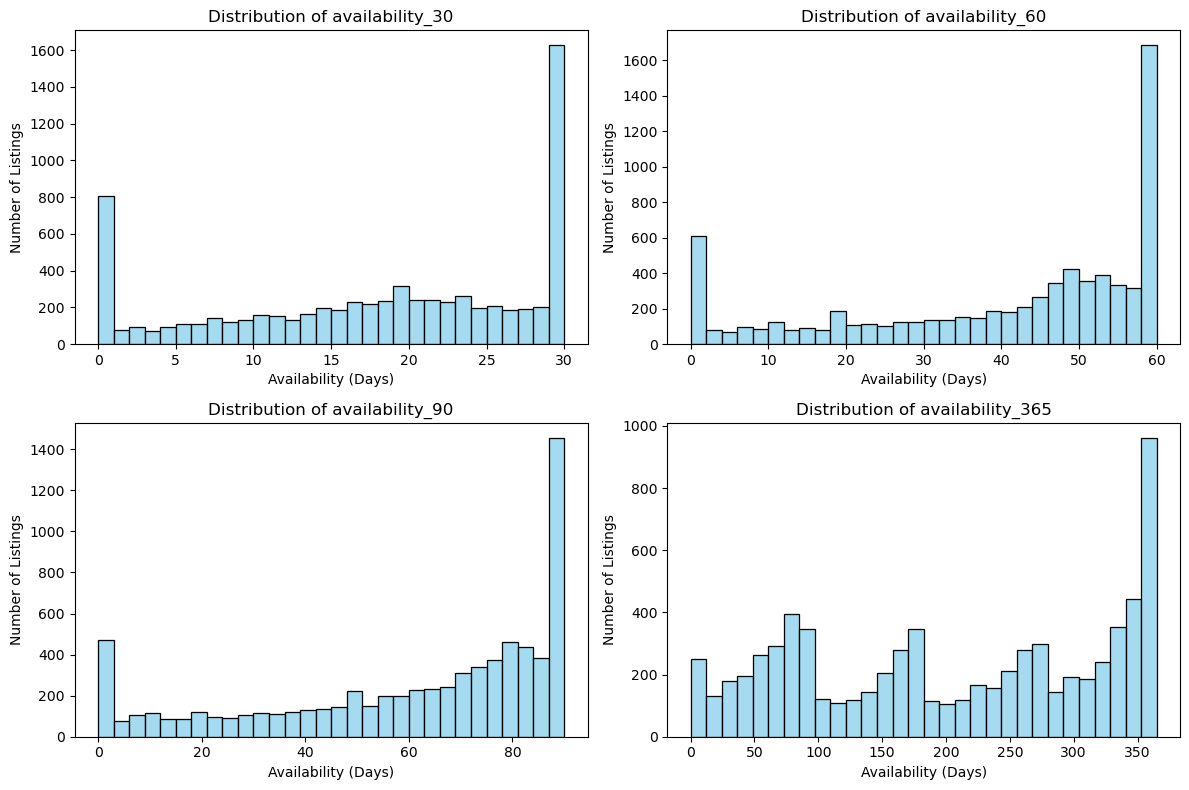

In [27]:
# histograms for availability columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(['availability_30', 'availability_60', 'availability_90', 'availability_365']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(listings_cleaned[col], bins=30, kde=False, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Availability (Days)')
    plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

In [28]:
listings_with_365_availability = listings_cleaned[listings_cleaned['availability_365'] == 365]

# Count the number of listings
num_listings_with_365_availability = len(listings_with_365_availability)

print(f"Number of listings with 365 days availability: {num_listings_with_365_availability}")

Number of listings with 365 days availability: 278


/var/folders/bg/bg6_lhk10cb2v0n9434vjxb80000gn/T/ipykernel_11161/473070626.py:3: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(x='neighbourhood_group_cleansed', y='availability_365', data=listings_cleaned, bw=.2, cut=0)


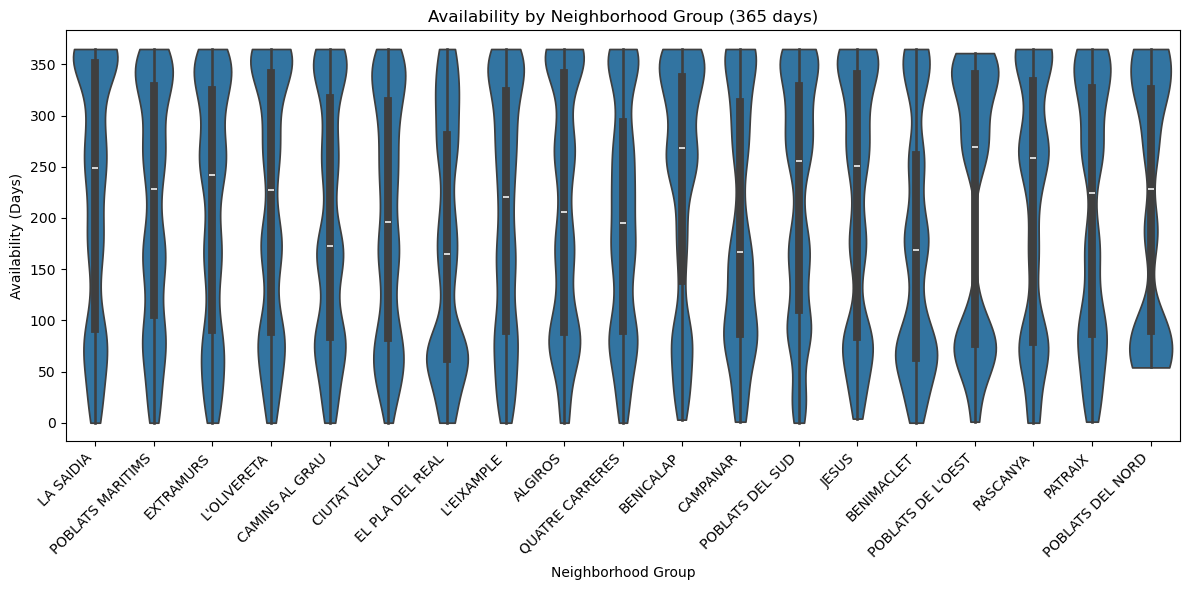

In [29]:
# availability_30 by neighbourhood
plt.figure(figsize=(12, 6))
sns.violinplot(x='neighbourhood_group_cleansed', y='availability_365', data=listings_cleaned, bw=.2, cut=0)
plt.title('Availability by Neighborhood Group (365 days)')
plt.xlabel('Neighborhood Group')
plt.ylabel('Availability (Days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Summary

### Price
#### Findings:

- In Valencia, 90% of listings have prices between $28.00 and and $250.00.
- The average listing price is $93.88. 


#### Takeaways:
- When pricing or re-pricing listings, hosts should consider the median price for their specific neighborhood group, particularly in POBLATS DEL NORD where prices tend to be higher.
- Understanding the price distribution can help hosts make informed decisions to attract bookings while maximizing revenue.
- Hosts should be aware of the overall price range and typical prices in Valencia to competitively position their listings.
- While price analysis provides valuable insights, the incomplete booking information limits a comprehensive understanding of booking patterns and revenue potential. Further data collection and analysis would enhance the ability to make more precise pricing recommendations.
--------------------------------------------------------------------------------------------------------------

### Reviews
#### Findings:
The median number of reviews per listing is 24.
The median overall review score value is 4.67.
The median scores for specific review aspects are as follows:
Accuracy: 4.82
Cleanliness: 4.78
Check-in: 4.88
Communication: 4.90
Location: 4.77

#### Takeaways
- The Customer Success team can use the review data to identify listings with below-average ratings.
- By accessing subsets based on neighborhood groups (e.g., neighbourhood_subsets["POBLATS MARITIMS"]), the team can focus on specific areas for improvement.
- Communicating with hosts about their review scores, comparing them to overall and neighborhood medians, can help identify areas for improvement.
- The team can develop targeted recommendations for hosts to enhance the guest experience and improve their review scores.
--------------------------------------------------------------------------------------------------------------

### Neighbourhood Group
#### Findings
- POBLATS DEL NORD has the highest median listing price despite having the fewest listings and the highest availability across various timeframes (365 days).
- 2 hosts with multiple listings also has a listing in POBLATS DEL NORD.

#### Takeaways
- The unique characteristics of POBLATS DEL NORD (high prices, low listing count, high availability) worths further investigation.
- Engaging with the host who has multiple listings, including one in POBLATS DEL NORD, could provide valuable insights into the dynamics of this neighborhood.

--------------------------------------------------------------------------------------------------------------
### Availability
#### Findings
- The histograms for availability (365 days) indicate a substantial portion with availability for 365 days.
- However, precise calculations reveal that only 200+ listings have full 365-day availability.

#### Takeaways
- Further analysis is needed to identify the specific listings with 365-day availability and understand their characteristics (e.g., price, location, property type).
- Continuous monitoring of these listings is recommended to track any changes in their availability patterns and identify potential opportunities or concerns for hosts.
- The Customer Success team can leverage this information to proactively engage with hosts and provide guidance on strategies to improve their listing performance.
